In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
# reflect an existing database into a new model
# Step 1
engine = create_engine("sqlite:///hawaii.sqlite")
print(engine)

Engine(sqlite:///hawaii.sqlite)


In [6]:
# Step 2
Base = automap_base()

In [7]:
# reflect an existing database into a new model
# reflect the tables
Base.prepare(engine, reflect=True)

In [8]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
#Base.classes.<class name>

Measurement = Base.classes.measurement
Station = Base.classes.station


In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

2016-08-23
[('2016-08-23', 0.0), ('2016-08-24', 0.08), ('2016-08-25', 0.08), ('2016-08-26', 0.0), ('2016-08-27', 0.0), ('2016-08-28', 0.01), ('2016-08-29', 0.0), ('2016-08-30', 0.0), ('2016-08-31', 0.13), ('2016-09-01', 0.0), ('2016-09-02', 0.0), ('2016-09-03', 0.0), ('2016-09-04', 0.03), ('2016-09-05', None), ('2016-09-06', None), ('2016-09-07', 0.05), ('2016-09-08', 0.0), ('2016-09-09', 0.03), ('2016-09-10', 0.0), ('2016-09-11', 0.05), ('2016-09-12', 0.0), ('2016-09-13', 0.02), ('2016-09-14', 1.32), ('2016-09-15', 0.42), ('2016-09-16', 0.06), ('2016-09-17', 0.05), ('2016-09-18', 0.0), ('2016-09-19', 0.0), ('2016-09-20', 0.0), ('2016-09-21', 0.0), ('2016-09-22', 0.02), ('2016-09-23', 0.0), ('2016-09-24', 0.0), ('2016-09-25', 0.0), ('2016-09-26', 0.06), ('2016-09-27', 0.02), ('2016-09-28', 0.0), ('2016-09-29', 0.0), ('2016-09-30', 0.0), ('2016-10-01', 0.0), ('2016-10-02', 0.0), ('2016-10-03', 0.0), ('2016-10-04', 0.0), ('2016-10-05', 0.0), ('2016-10-06', 0.0), ('2016-10-07', 0.0), ('20

 2017-08-23           0.45
       date  precipitation
 2016-08-23           0.00
 2016-08-23            NaN
 2016-08-23           1.79
 2016-08-23           0.05
 2016-08-23           0.15
 2016-08-23           0.70
 2016-08-23           0.02
 2016-08-24           0.08
 2016-08-24           2.15
 2016-08-24           2.28
 2016-08-24            NaN
 2016-08-24           1.45
 2016-08-24           1.22
 2016-08-24           2.15
 2016-08-25           0.08
 2016-08-25           0.00
 2016-08-25           0.21
 2016-08-25           0.06
 2016-08-25           0.00
 2016-08-25           0.11
 2016-08-25           0.08
 2016-08-26           0.03
 2016-08-26           0.01
 2016-08-26           0.00
 2016-08-26           0.04
 2016-08-26           0.02
 2016-08-26           0.00
 2016-08-27           0.18
 2016-08-27           0.12
 2016-08-27           0.00
 2016-08-27           0.00
 2016-08-27           0.02
 2016-08-27            NaN
 2016-08-28           0.60
 2016-08-28           0.14
 

(array([   0.,  250.,  500.,  750., 1000., 1250., 1500., 1750., 2000.,
        2250.]), <a list of 10 Text xticklabel objects>)

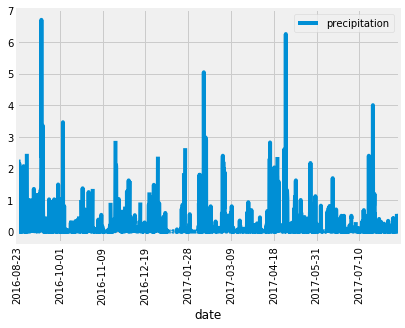

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
#Starting from the last data point in the database. 

# Calculate the date one year from the last date in data set.
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print(prev_year)
# Perform a query to retrieve the data and precipitation scores
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year).all()
print(results)
# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(results, columns=['date','precipitation'])
df.head()

df.set_index(df['date'], inplace=True)
print(df)
# By setting inplace=True,  we’re saying that we do not want to create a new DataFrame 
# If we set it to “False,”  then we would create a new DataFrame.

print(df.to_string(index=False))


# Sort the dataframe by date
df = df.sort_index()
print(df.to_string(index=False))
      
# Use Pandas Plotting with Matplotlib to plot the data

df.plot()
plt.tight_layout()
plt.xticks(rotation=90)

In [12]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [13]:
# How many stations are available in this dataset?
# session here isp passes url based on the engine session=Session(engine) and engine = engine = create_engine("sqlite:///hawaii.sqlite")
# Station = Base.classes.station; Station is key
session.query()
session.query(func.count(Station.station)).all()
print(session.query(func.count(Station.station)).all())



[(9,)]


In [14]:
# What are the most active stations?
# Desc() is decending
session.query(Measurement.station, func.count(Measurement.station)).\
group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

# List the stations and the counts in descending order.


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [15]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
# tob is temperature
print(session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).all())

session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
filter(Measurement.station == 'USC00519281').all()

[(53.0, 87.0, 73.09795396419437)]


[(54.0, 85.0, 71.66378066378067)]

[(77.0,), (77.0,), (80.0,), (80.0,), (75.0,), (73.0,), (78.0,), (77.0,), (78.0,), (80.0,), (80.0,), (78.0,), (78.0,), (78.0,), (73.0,), (74.0,), (80.0,), (79.0,), (77.0,), (80.0,), (76.0,), (79.0,), (75.0,), (79.0,), (78.0,), (79.0,), (78.0,), (78.0,), (76.0,), (74.0,), (77.0,), (78.0,), (79.0,), (79.0,), (77.0,), (80.0,), (78.0,), (78.0,), (78.0,), (77.0,), (79.0,), (79.0,), (79.0,), (79.0,), (75.0,), (76.0,), (73.0,), (72.0,), (71.0,), (77.0,), (79.0,), (78.0,), (79.0,), (77.0,), (79.0,), (77.0,), (78.0,), (78.0,), (78.0,), (78.0,), (77.0,), (74.0,), (75.0,), (76.0,), (73.0,), (76.0,), (74.0,), (77.0,), (76.0,), (76.0,), (74.0,), (75.0,), (75.0,), (75.0,), (75.0,), (71.0,), (63.0,), (70.0,), (68.0,), (67.0,), (77.0,), (74.0,), (77.0,), (76.0,), (76.0,), (75.0,), (76.0,), (75.0,), (73.0,), (75.0,), (73.0,), (75.0,), (74.0,), (75.0,), (74.0,), (75.0,), (73.0,), (75.0,), (73.0,), (73.0,), (74.0,), (70.0,), (72.0,), (70.0,), (67.0,), (67.0,), (69.0,), (70.0,), (68.0,), (69.0,), (69.0,), 

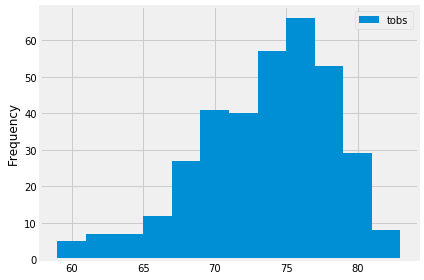

In [69]:
# Choose the station with the highest number of temperature observations.
results = session.query(Measurement.tobs).\
filter(Measurement.station == 'USC00519281').\
filter(Measurement.date >= prev_year).all()
print(results)
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
df = pd.DataFrame(results, columns=['tobs'])

print(df.head())

df.plot.hist(bins=12)
plt.tight_layout()


In [17]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates


# Challenge

In [154]:
# Perform a query to retrieve  precipitation and temp accross all station
#def rain(month):
def rainfall(month):
    results2 = session.query(Measurement.date,Measurement.station, Measurement.prcp, func.strftime("%m", Measurement.date),func.strftime("%Y", Measurement.date)).\
                    filter(func.strftime("%m", Measurement.date)==month).all()
    
    df2 = pd.DataFrame(results2, columns=['date','station_id','precipitation','Month', 'Year'])
    
    df2=df2.sort_values('date',axis=0)
   
    #plot graph 
    #month_name=dt.date(1900, month, 1).strftime('%B')
    str=f'Rainfall accross All Stantions & Years for the month of', month
                
    X=df2.plot(x='date',y='precipitation')
    plt.tight_layout()                                          
    plt.xticks(rotation=90)
    plt.xlabel('date')
    plt.ylabel ('Rainfall In Inches')
    plt.title(str)
    return df2.describe(),"*************", df2.head(), "*********", X                     
                                              


(       precipitation
 count    1574.000000
 mean        0.136360
 std         0.335731
 min         0.000000
 25%         0.000000
 50%         0.020000
 75%         0.120000
 max         4.430000,
 '*************',
            date   station_id  precipitation Month  Year
 0    2010-06-01  USC00519397           0.00    06  2010
 472  2010-06-01  USC00514830           0.01    06  2010
 658  2010-06-01  USC00517948           0.00    06  2010
 806  2010-06-01  USC00518838            NaN    06  2010
 844  2010-06-01  USC00519523           0.03    06  2010,
 '*********',
 <matplotlib.axes._subplots.AxesSubplot at 0x2c149366c48>)

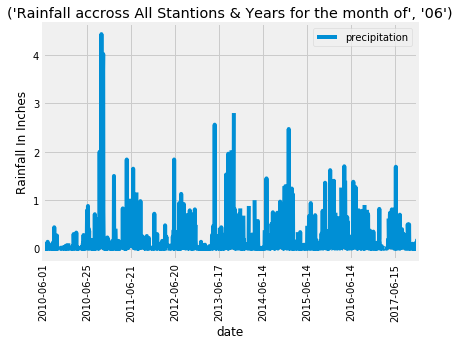

In [155]:
rainfall('06')

(       precipitation
 count    1405.000000
 mean        0.216819
 std         0.541399
 min         0.000000
 25%         0.000000
 50%         0.030000
 75%         0.150000
 max         6.420000,
 '*************',
            date   station_id  precipitation Month  Year
 0    2010-12-01  USC00519397           0.04    12  2010
 426  2010-12-01  USC00514830           0.03    12  2010
 604  2010-12-01  USC00517948           0.70    12  2010
 732  2010-12-01  USC00519523           0.03    12  2010
 942  2010-12-01  USC00519281           1.35    12  2010,
 '*********',
 <matplotlib.axes._subplots.AxesSubplot at 0x2c14a4050c8>)

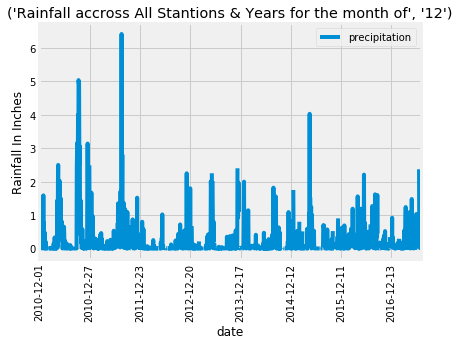

In [156]:
rainfall('12')

In [157]:
def Temp(month):
    results2 = session.query(Measurement.date,Measurement.station, Measurement.tobs, func.strftime("%m", Measurement.date),func.strftime("%Y", Measurement.date)).\
                    filter(func.strftime("%m", Measurement.date)==month).all()
    
    df2 = pd.DataFrame(results2, columns=['date','station_id','precipitation','Month', 'Year'])

    #df2['month']=pd.to_datetime(df2['date'],format="%m")
                                            
    str=f'Temperature accross All Stantions & Years for the month of', month           
    y= df.plot.hist(bins=12)
    plt.tight_layout()
    plt.xlabel('Temprature In Fahrenheit')
    plt.ylabel ('Frequency of days during month')
    plt.title(str)
    #y=df2.plot.boxplot()
    #plt.tight_layout() 
    
    return df2.describe(),"**************",df2.head(),"**********",y                   
                                              

(       precipitation
 count    1700.000000
 mean       74.944118
 std         3.257417
 min        64.000000
 25%        73.000000
 50%        75.000000
 75%        77.000000
 max        85.000000,
 '**************',
          date   station_id  precipitation Month  Year
 0  2010-06-01  USC00519397           78.0    06  2010
 1  2010-06-02  USC00519397           76.0    06  2010
 2  2010-06-03  USC00519397           78.0    06  2010
 3  2010-06-04  USC00519397           76.0    06  2010
 4  2010-06-05  USC00519397           77.0    06  2010,
 '**********',
 <matplotlib.axes._subplots.AxesSubplot at 0x2c14a4dff08>)

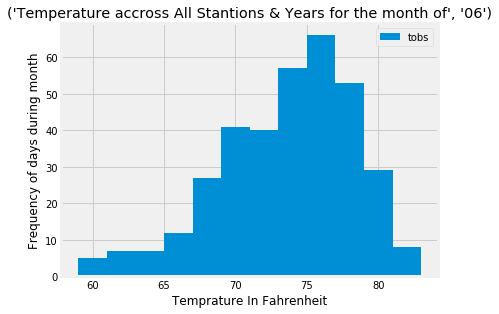

In [158]:
Temp('06')

(       precipitation
 count    1517.000000
 mean       71.041529
 std         3.745920
 min        56.000000
 25%        69.000000
 50%        71.000000
 75%        74.000000
 max        83.000000,
 '**************',
          date   station_id  precipitation Month  Year
 0  2010-12-01  USC00519397           76.0    12  2010
 1  2010-12-03  USC00519397           74.0    12  2010
 2  2010-12-04  USC00519397           74.0    12  2010
 3  2010-12-06  USC00519397           64.0    12  2010
 4  2010-12-07  USC00519397           64.0    12  2010,
 '**********',
 <matplotlib.axes._subplots.AxesSubplot at 0x2c14a5c48c8>)

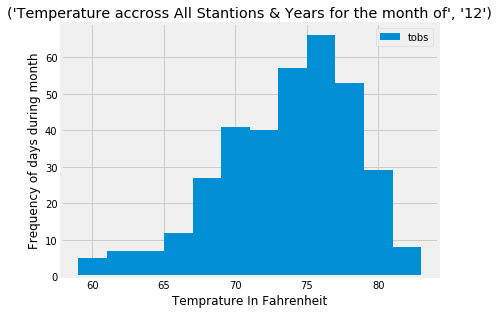

In [159]:
Temp('12')